In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy

In [2]:
weat_corr = pd.read_csv("WEAT_SOS_survey_correlations.csv", index_col = False)
rnsb_corr = pd.read_csv("RNSB_SOS_survey_correlations.csv", index_col = False)
rnd_corr = pd.read_csv("RND_SOS_survey_correlations.csv", index_col = False)
ect_corr = pd.read_csv("ECT_SOS_survey_correlations.csv", index_col = False)
our_metric_corr = pd.read_csv("my_metric_swear_wors_list2_SOS_survey_correlations.csv", index_col = False)

In [3]:
weat_corr["hate_survey"].unique()

array(['OEOH_Finland', 'OEOH_US', 'OEOH_Germany', 'OEOH_UK', 'RAD'],
      dtype=object)

In [4]:
WEAT_OEOH_Fin_stat = weat_corr[weat_corr["hate_survey"] == "OEOH_Finland"]
WEAT_OEOH_US_stat = weat_corr[weat_corr["hate_survey"] == "OEOH_US"]

RNSB_OEOH_Fin_stat = rnsb_corr[rnsb_corr["hate_survey"] == "OEOH_Finland"]
RNSB_OEOH_US_stat = rnsb_corr[rnsb_corr["hate_survey"] == "OEOH_US"]

RND_OEOH_Fin_stat = rnd_corr[rnd_corr["hate_survey"] == "OEOH_Finland"]
RND_OEOH_US_stat = rnd_corr[rnd_corr["hate_survey"] == "OEOH_US"]

ECT_OEOH_Fin_stat = ect_corr[ect_corr["hate_survey"] == "OEOH_Finland"]
ECT_OEOH_US_stat = ect_corr[ect_corr["hate_survey"] == "OEOH_US"]

OM_OEOH_Fin_stat = our_metric_corr[our_metric_corr["hate_survey"] == "OEOH_Finland"]
OM_OEOH_US_stat = our_metric_corr[our_metric_corr["hate_survey"] == "OEOH_US"]

#OEOH_UK_stat = stats_Corr[stats_Corr["hate_survey"] == "OEOH_UK"]
#OEOH_fin_stat = stats_Corr[stats_Corr["hate_survey"] == "OEOH_Finland"]
#OEOH_GR_stat = stats_Corr[stats_Corr["hate_survey"] == "OEOH_Germany"]

In [6]:
columns = ['WEAT', 'RNSB', 'RND', 'ECT', 'NCSP']
rows = ["w2v", "glv-wk", "glv-twtr", "ud", "chan", "glv-cc","glv-cc-large","ft-cc", "ft-cc-sws",'ft-wk',
       'ft-wk-sws','sswe','debias-w2v','p-desip','u-desip']

In [7]:
OHOE_Fin_stat = pd.DataFrame({'WE': rows,
                         "WEAT":WEAT_OEOH_Fin_stat["pearson_r"],
                         "RNSB": RNSB_OEOH_Fin_stat["pearson_r"],
                        "RND":RND_OEOH_Fin_stat["pearson_r"],
                        "ECT":ECT_OEOH_Fin_stat["pearson_r"],
                        "NCSP":OM_OEOH_Fin_stat["pearson_r"]})

In [8]:
OHOE_US_stat = pd.DataFrame({'WE': rows,
                         "WEAT":WEAT_OEOH_US_stat["pearson_r"],
                         "RNSB": RNSB_OEOH_US_stat["pearson_r"],
                        "RND":RND_OEOH_US_stat["pearson_r"],
                        "ECT":ECT_OEOH_US_stat["pearson_r"],
                        "NCSP":OM_OEOH_US_stat["pearson_r"]})

In [9]:
OHOE_US_stat[columns].values.T

array([[ 0.98361112,  0.31109343,  0.18421163,  0.4859715 ,  0.96575717,
         0.34547791,  0.77755829,  0.68812698,  0.65505803,  0.84805011,
         0.66999841,  0.40364062,  0.99286172,  0.77033051,  0.72699278],
       [ 0.28912084,  0.49708135,  0.07446369,  0.93384938, -0.99351823,
         0.5724957 ,  0.01439838,  0.95005908, -0.56277212,  0.96653102,
        -0.95069318, -0.81183607, -0.63954113, -0.13068352,  0.18150716],
       [ 0.64663155,  0.04634322, -0.33947566,  0.6052183 ,  0.04013329,
         0.6242073 ,  0.60897466,  0.57730068,  0.03609132,  0.554756  ,
        -0.00109212,  0.3123623 ,  0.55588777,  0.32844146,  0.31554623],
       [ 0.4004287 ,  0.55608279,  0.55834778,  0.99152724,  0.9087173 ,
         0.55898997,  0.57891123,  0.71252984,  0.67222917,  0.6402042 ,
         0.67068338,  0.60571952,  0.87709026,  0.69496549,  0.68290507],
       [ 0.99917365,  0.09700464, -0.99992643, -0.23400944, -0.82304163,
        -0.94563906,  0.92910687,  0.99988395, 

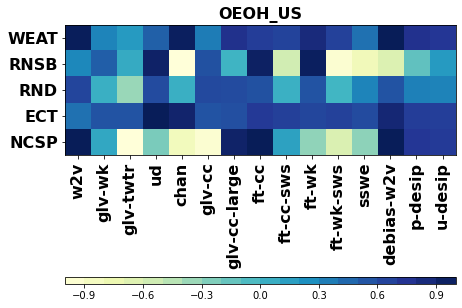

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
x_ticks = np.arange(len(rows))
y_ticks = np.arange(len(columns))


# We use ax parameter to tell seaborn which subplot to use for this plot
#sns.heatmap(data=RAD_stat[columns].values.T, ax=axs[0], vmin=-1, vmax=1,cbar=True, cmap="YlGnBu")
im0 = axs.imshow(OHOE_US_stat[columns].values.T, cmap ="YlGnBu")
axs.set_title('OEOH_US', fontweight="bold", fontsize=16)
axs.set_xticks(x_ticks)
axs.set_yticks(y_ticks)
axs.set_xticklabels(["" for i in rows], fontweight="bold", rotation=90, fontsize=16)
axs.set_xticklabels(rows, fontweight="bold", rotation=90, fontsize=16)
axs.set_yticklabels(columns, fontweight="bold", rotation=0, fontsize=16)

#sns.heatmap(data=OHOE_US_stat[columns].values.T, ax=axs[1], vmin=-1, vmax=1,cbar=True, yticklabels=False,cmap="YlGnBu", cbar_kws={"orientation": "vertical"})
#im1 = axs[1].imshow(OHOE_US_stat[columns].values.T, cmap ="YlGnBu")
#axs[1].set_title('OEOH-US', fontweight="bold", fontsize=16)
#axs[1].set_xticks(x_ticks)
#axs[1].set_yticks(y_ticks)
#axs[1].set_xticklabels(rows, fontweight="bold", rotation=90, fontsize=16)
#axs[1].set_yticklabels(columns, fontweight="bold", rotation=0, fontsize=16)

#plt.colorbar(im0,boundaries=np.arange(-1,1,0.1), shrink=0.7, orientation="horizontal", location="top")
#cbar_ax = fig.add_axes([0.91, 0.2, 0.05, 0.6])
#fig.colorbar(im0, cax=cbar_ax,boundaries=np.arange(-1,1.1,0.1), shrink=0.2)
divider = make_axes_locatable(axs)
cax = divider.new_vertical(size='5%', pad=1.7, pack_start = True)
fig.add_axes(cax)
fig.colorbar(im0, cax = cax, boundaries=np.arange(-1,1.1,0.1), orientation = 'horizontal')
#sns.heatmap(data=OEOH_fin_stat[columns], ax=ax4, vmin=-1, vmax=1,cbar=True, yticklabels=False,cbar_kws={'label': 'correlation'},cmap="YlGnBu")
#ax4.set_title('OEOH-UK', fontweight="bold", fontsize=35)
#ax4.set_ylabel("")
#ax4.set_xticklabels(columns, fontweight="bold", rotation=90, fontsize=35)

#sns.heatmap(data=OEOH_GR_stat[columns], ax=ax5, vmin=-1, vmax=1,cbar=False, yticklabels=False,cmap="YlGnBu")
#ax5.set_title('OEOH-Germany', fontweight="bold", fontsize=35)
#ax5.set_ylabel("")
#ax5.set_xticklabels(columns, fontweight="bold", rotation=45, fontsize=35)

#sns.heatmap(data=OEOH_fin_stat[columns], ax=ax5, vmin=-1, vmax=1,cbar=True, yticklabels=False,cbar_kws={'label': 'correlation'},cmap="YlGnBu")
#ax5.set_title('OEOH-FI', fontweight="bold", fontsize=35)
#ax5.set_ylabel("")
#ax5.set_xticklabels(columns, fontweight="bold", fontsize=35, rotation=90)

In [11]:
fig.savefig("heat_map_sos_metrics_corr_swear_words_list2.pdf",bbox_inches='tight')